**Instructor**: Prof. Peter Beerel (pabeerel@usc.edu)

**Teaching Assistant**: Alexios Rustom (arustom@usc.edu)

**Notebooks**: Written by Alexios Rustom (arustom@usc.edu)

# Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
def check_nan(df):
  for col in df.columns[0:-1]:
    count = df[col].isnull().sum()
    print(f"Does df[{col}] contain NaN? {'Yes' if count > 0 else 'No'} - Count: {count}")

In [3]:
def plot_histo_classes(df, label):
    fig, ax = plt.subplots(1, 1, figsize=(10, 5))
    ax_plot = df.groupby(label).size().plot(kind='bar', color=['red', 'green', 'blue'], edgecolor='black')
    ax.set_xlabel("")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    plt.show()

In [4]:
def draw_distributions_box_plot(y_df, x_df, start_feature, end_feature, label):
    colors = ['red', 'green', 'blue']
    data = pd.concat([y_df,x_df.iloc[:,start_feature:end_feature]],axis=1)
    data = pd.melt(data,id_vars=label,
                        var_name="Features",
                        value_name='Value')
    fig, ax = plt.subplots(figsize=(15,7))
    sns.violinplot(x="Features", y="Value", hue=label, data=data,split=True, inner="quart",palette =colors) #Draw a combination of boxplot and kernel density estimate.
    ax.set_xlabel("")
    plt.show()

In [5]:
def plot_box_plots(df, label):
  num_features = len(df.columns)-1
  num_rws = int(num_features/2)
  fig, ax = plt.subplots(num_rws, num_rws, figsize=(20,10))
  ax = ax.flatten()
  colors = ['red', 'green', 'blue']
  for i, col in enumerate(df.columns):
      if col != label:
          sns.boxplot(x=label, y=col, data=df, ax=ax[i], palette = colors, hue=label)
          ax[i].set_title(f'Boxplot of {col}')
  plt.tight_layout()
  plt.show()

In [6]:
def plot_pairplot(y_df, x_df, start_feature, end_feature, label):
    colors = ['red', 'green', 'blue']
    data = pd.concat([y_df,x_df.iloc[:,start_feature:end_feature]],axis=1)
    grid=sns.pairplot(data=data,kind ="scatter",hue=label,palette=colors)
    plt.show()

In [7]:
def create_dataframe(x_train, x_test, y_train, y_test, label):
    feature_columns = [f'X{i+1}' for i in range(x_train.shape[1])]

    df_train = pd.DataFrame(x_train, columns=feature_columns)
    df_train[label] = y_train

    df_test = pd.DataFrame(x_test, columns=feature_columns)
    df_test[label] = y_test

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    df_train.groupby(label).size().plot(kind='bar', color=['red', 'green', 'blue'], edgecolor='black', ax=ax1)
    ax1.set_xlabel("")
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0)
    ax1.set_title(f'Train Data')

    df_test.groupby(label).size().plot(kind='bar', color=['red', 'green', 'blue'], edgecolor='black', ax=ax2)
    ax2.set_xlabel("")
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0)
    ax2.set_title(f'Test Data')

    plt.tight_layout()
    plt.show()
    return df_train, df_test

In [9]:
iris_df = pd.read_csv('readData/iris.csv')

In [10]:
check_nan(iris_df)

Does df[sepal_length] contain NaN? No - Count: 0
Does df[sepal_width] contain NaN? No - Count: 0
Does df[petal_length] contain NaN? No - Count: 0
Does df[petal_width] contain NaN? No - Count: 0


In [11]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [12]:
label = 'species'

In [13]:
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [14]:
duplicate_rows = iris_df[iris_df.duplicated(keep=False)]
print("Duplicate data: \n", duplicate_rows)

Duplicate data: 
      sepal_length  sepal_width  petal_length  petal_width    species
9             4.9          3.1           1.5          0.1     setosa
34            4.9          3.1           1.5          0.1     setosa
37            4.9          3.1           1.5          0.1     setosa
101           5.8          2.7           5.1          1.9  virginica
142           5.8          2.7           5.1          1.9  virginica


In [15]:
iris_df=iris_df.drop_duplicates()

In [16]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 147 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  147 non-null    float64
 1   sepal_width   147 non-null    float64
 2   petal_length  147 non-null    float64
 3   petal_width   147 non-null    float64
 4   species       147 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.9+ KB


In [17]:
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


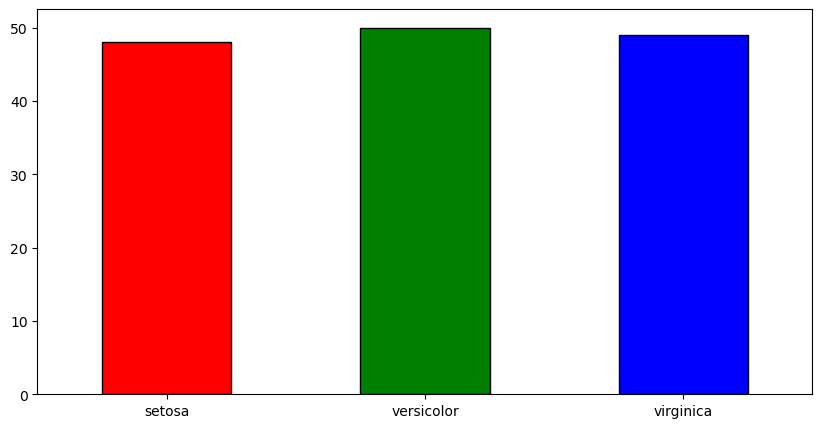

In [18]:
plot_histo_classes(iris_df, label = label)

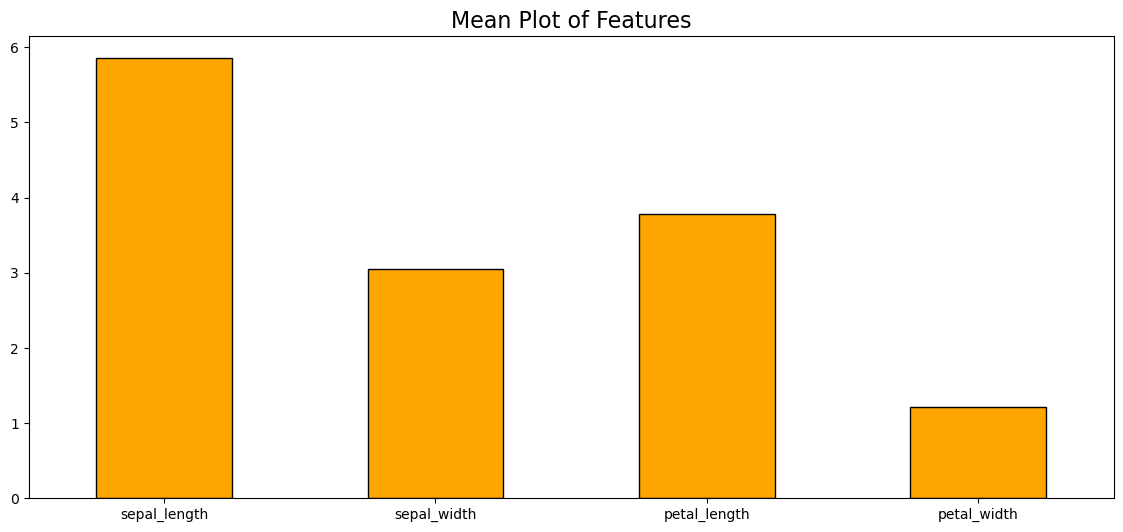

In [19]:
data_mean = iris_df.describe().loc['mean']
data_mean.plot(kind='bar', figsize=(14,6), color='orange', edgecolor='black')
plt.xticks(rotation=0)
plt.title('Mean Plot of Features', fontsize=16)
plt.show()

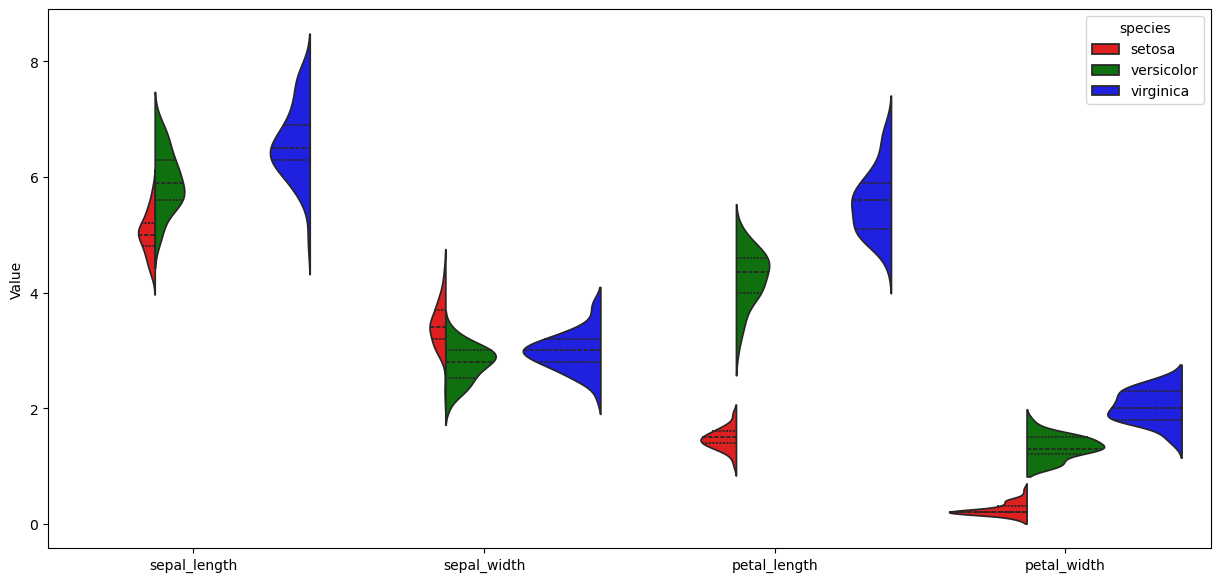

In [20]:
draw_distributions_box_plot(iris_df[label],iris_df, start_feature=0, end_feature=-1, label = label)

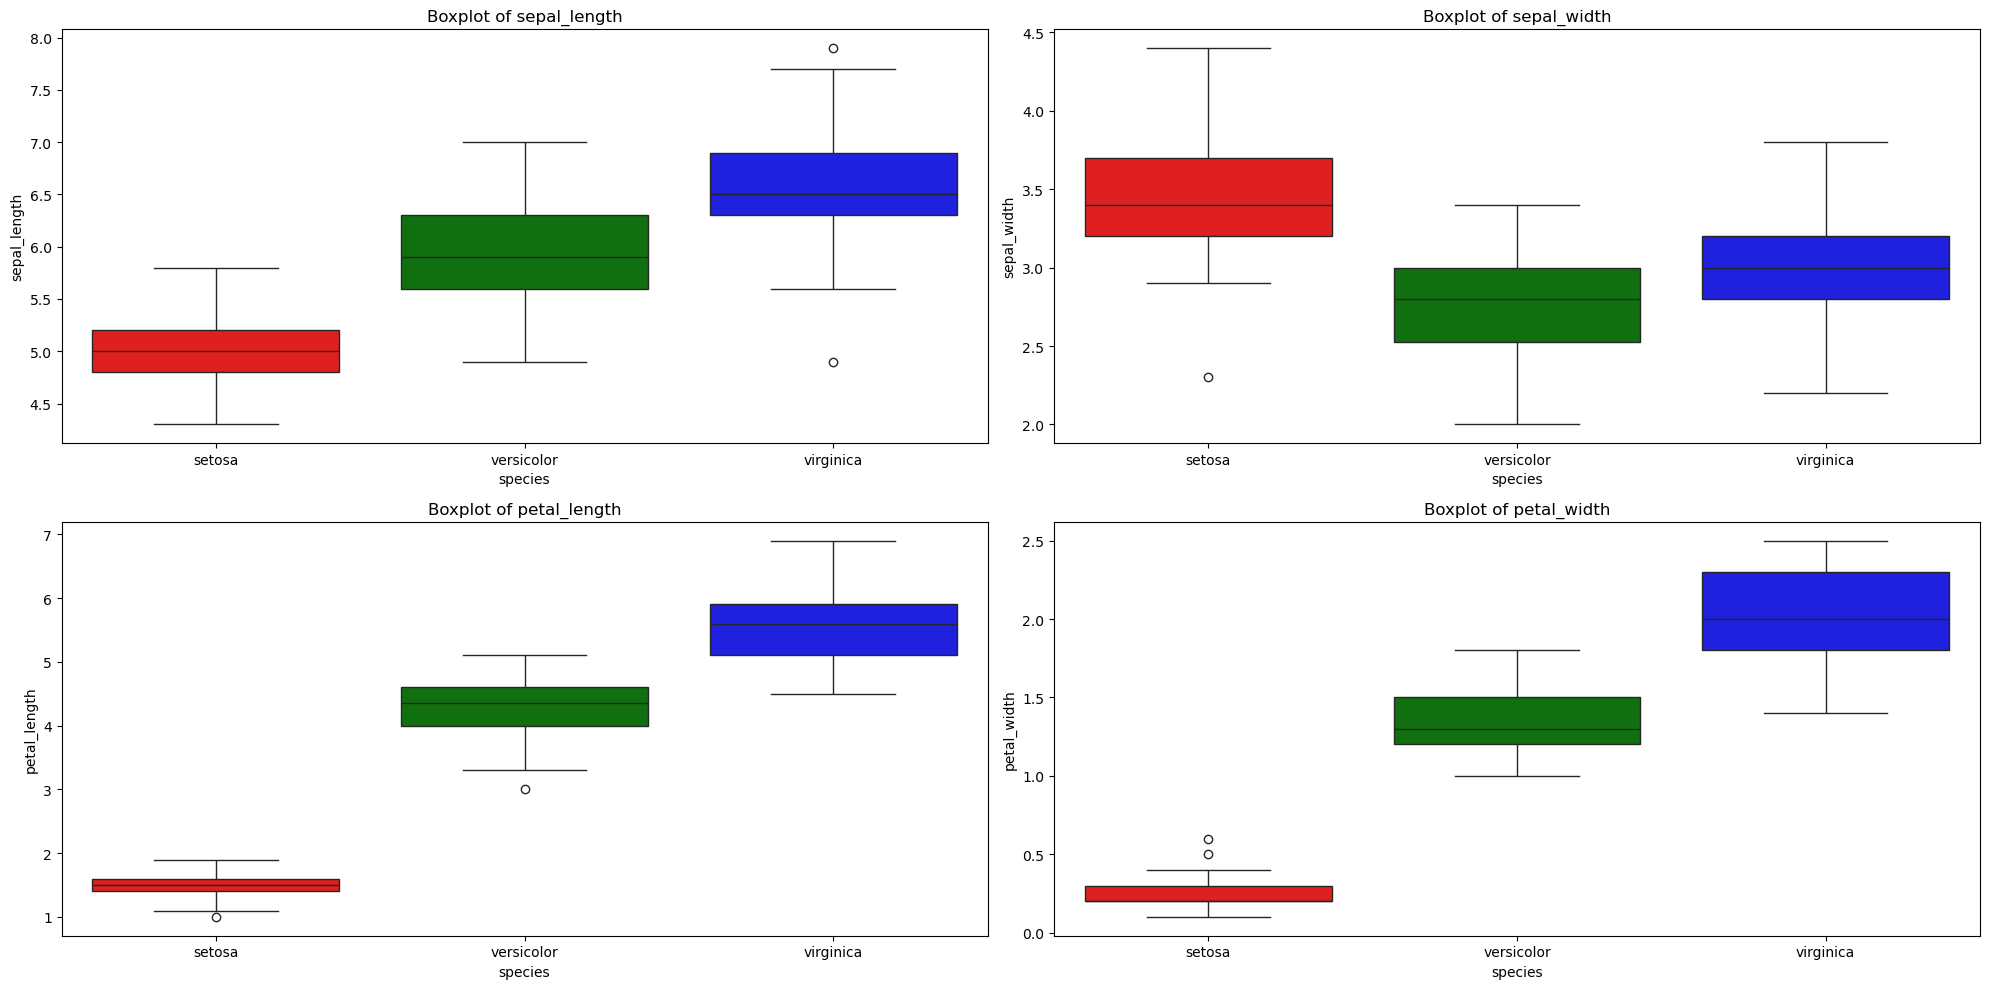

In [21]:
plot_box_plots(iris_df, label=label)

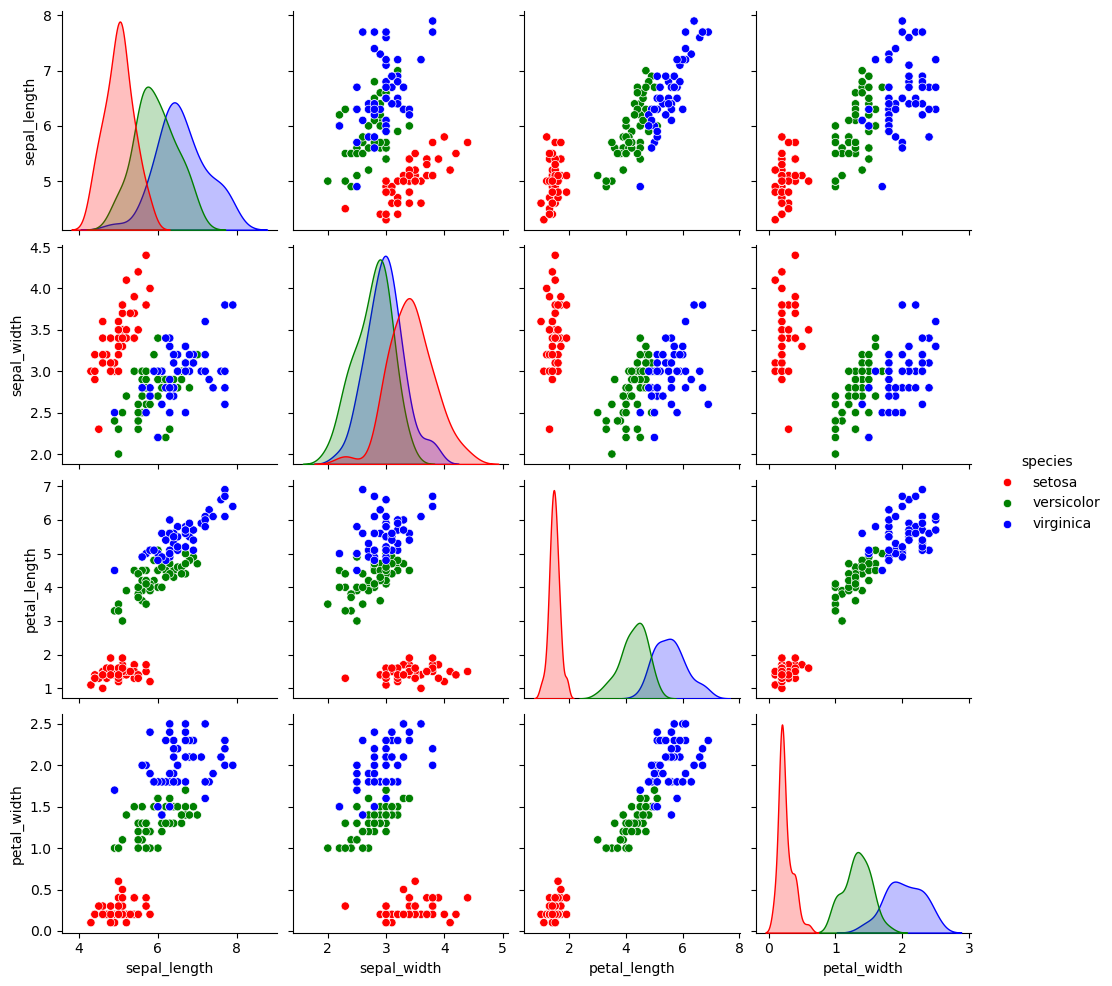

In [22]:
plot_pairplot(iris_df['species'], iris_df, start_feature=0, end_feature=-1, label = 'species')

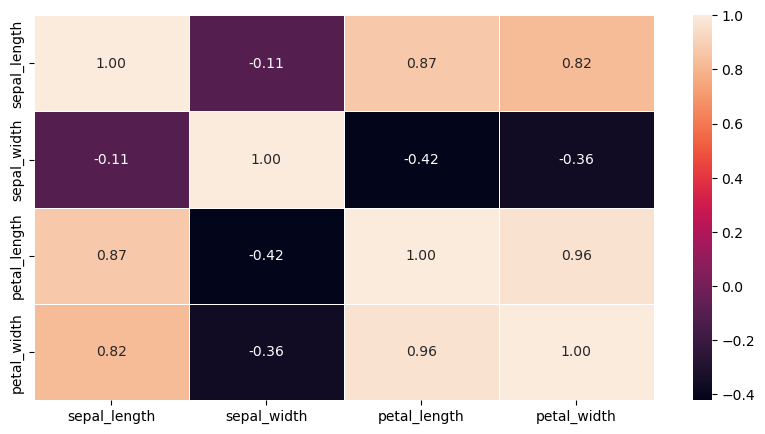

In [23]:
f,ax = plt.subplots(figsize=(10, 5))
sns.heatmap(iris_df.drop(columns=[label]).corr(), annot=True, linewidths=.5, fmt= '.2f',ax=ax)
plt.show()

## Training and inference

In [24]:
x_data = iris_df.drop(label, axis=1).to_numpy()
y_data = iris_df[label].to_numpy()

In [25]:
label_encoder = LabelEncoder()
y_data_encoded = label_encoder.fit_transform(y_data)

In [26]:
class_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print("Class mapping:", class_mapping)

Class mapping: {'setosa': 0, 'versicolor': 1, 'virginica': 2}


In [27]:
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data_encoded, test_size=0.2, random_state=42)

In [28]:
print('Size of X_train dataset: ', X_train.shape)
print('Size of y_train dataset: ', y_train.shape)
print('Size of X_test dataset: ', X_test.shape)
print('Size of y_test dataset: ', y_test.shape)

Size of X_train dataset:  (117, 4)
Size of y_train dataset:  (117,)
Size of X_test dataset:  (30, 4)
Size of y_test dataset:  (30,)


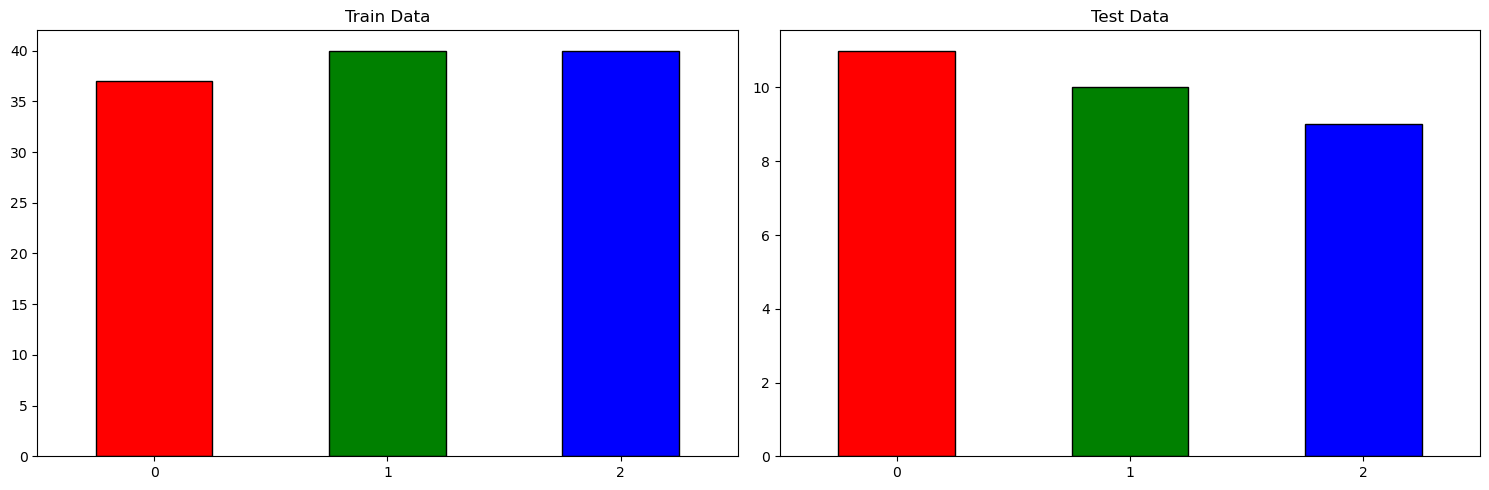

In [29]:
df_train, df_test = create_dataframe(X_train, X_test, y_train, y_test, label)

In [30]:
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train)
svm_predictions = svm_model_linear.predict(X_test)
accuracy = svm_model_linear.score(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Accuracy: 96.67%


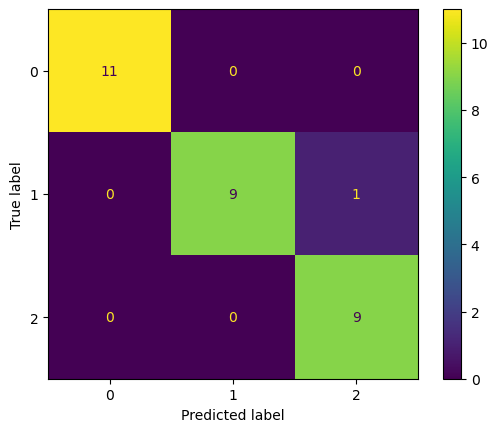

In [31]:
cm = confusion_matrix(y_test, svm_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=svm_model_linear.classes_)
disp.plot()
plt.show()
